<a href="https://colab.research.google.com/github/satoshi99/machine_learning_notebooks/blob/main/DBSCAN_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DBSCANを使って高密度の領域を特定する

##Density based Spatial Clustering of Applications with Noise)

データの局所的な密度に基づいて、データ点を以下３つの点に割り当てる

⇨この密度は、指定された半径ε以内に存在する点の個数として定義

* コア点・・・半径ε以内に、指定された個数（MinPts）の隣接点がある点
* ボーダー点・・・隣接点の個数がMinPtsに満たないものの、コア点の半径ε以内に位置する点
* ノイズ点・・・コア点でもボーダー点でもない、その他の点

この３つの分類を元に、データ点がどのクラスタ（データ群）に属するかを予測するのがDBSCAN

###練習用データの準備

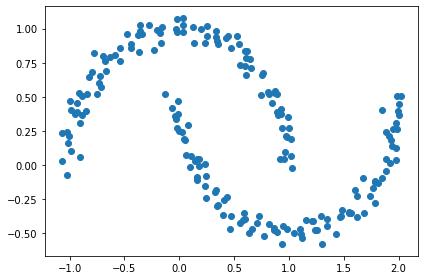

In [1]:
#練習用のデータセット（skleanで提供されてる半月形のデータ群）を準備
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
#matplotlibでグラフ化
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

このデータは２種類のクラスラベル（0, 1：上凸の半月と下凸の半月）に分けられている。

クラスごとに色分けすると以下のようになる

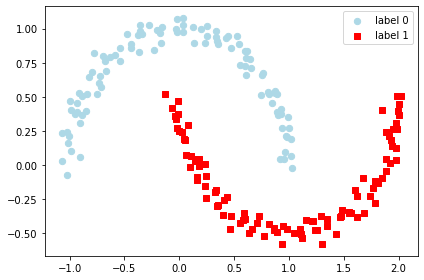

In [9]:
plt.scatter(X[y==0, 0], X[y==0, 1], c='lightblue', marker="o", s=40, label="label 0")
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker="s", s=40, label="label 1")
plt.legend()
plt.tight_layout()
plt.show()

###DBSCANで学習させ、データ点がどちらのクラスタか予測する

上の２つの半月のデータ群を精度良く分類したい。

以下DBSCANを使ってデータXを学習させて、クラスラベルを予測する。

予測したクラスラベルでグラフ化して確かめる。

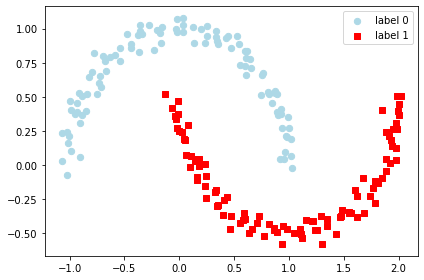

In [10]:
from sklearn.cluster import DBSCAN #sklearnからDBSCANをインポート

#DBSCANを使う準備（eps=コア点とボーダ点を決める時の領域の半径, min_samples=epsの半径内に少なくとも存在する点の個数, metric=点間の距離の計算方法）
#epsやmin_samplesは好きな値に決めることができるが、各データセットや問題に最適な値を見つける必要がある。
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')

#fit_predict()はデータXを学習して、その予測値を返す。y_dbにはその予測値が代入される。fitが学習、predictが予測を意味する。
y_db = db.fit_predict(X) 

#以下はグラフ化のコード
#y_db（予測ラベル）が0のデータXを水色でプロット
plt.scatter(X[y_db==0, 0], X[y_db==0, 1], c='lightblue', marker="o", s=40, label="label 0")
#y_db（予測ラベル）が1のデータXを赤色でプロット
plt.scatter(X[y_db==1, 0], X[y_db==1, 1], c='red', marker="s", s=40, label="label 1")
plt.legend()
plt.tight_layout()
plt.show()

上のグラフから、２種類の半月型のクラスタを分類できている。

ちなみにaucを計算すると、このデータの場合は完璧に分類できているのでaucは1になる。

In [11]:
from sklearn.metrics import roc_auc_score #sklearnのaucを計算する関数をインポート
auc = roc_auc_score(y_true=y, y_score=y_db) #正解ラベルyと予測ラベルy_dbでaucを計算
print(auc) #aucを出力

1.0
